# Scope
For this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, I will analyze, prepare, and plot data in order to answer questions in a meaningful way.

* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?
* What is the distribution of that life expectancy?


# Load the Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

# Read in Data
life_expectancy_data = pd.read_csv("all_data.csv")
print(life_expectancy_data.head())
print(life_expectancy_data.info())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


# Explore and Explain Data

## Life Expectancy by Country

                          Life expectancy at birth (years)
Country                                                   
Chile                                             78.94375
China                                             74.26250
Germany                                           79.65625
Mexico                                            75.71875
United States of America                          78.06250
Zimbabwe                                          50.09375


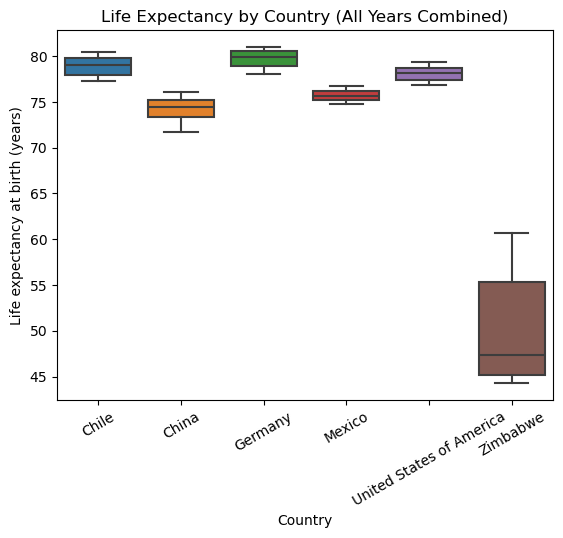

<Figure size 640x480 with 0 Axes>

In [87]:
# Life expectancy by country
country_life_expectancy = life_expectancy_data[['Country', 'Life expectancy at birth (years)']]
group_by_avg = country_life_expectancy.groupby('Country').mean()
print(group_by_avg)

sns.boxplot(x = 'Country', y = 'Life expectancy at birth (years)', data = life_expectancy_data)
plt.xticks(rotation=30)
plt.title('Life Expectancy by Country (All Years Combined)')
plt.show()
plt.clf()

## Country Life Expectancy Trend by Year

C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

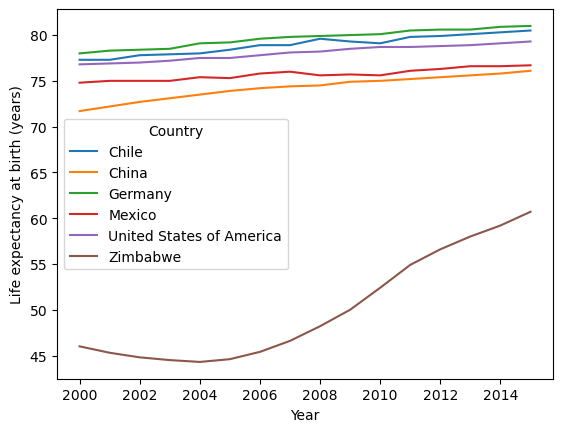

<Figure size 640x480 with 0 Axes>

In [32]:
# print(life_expectancy_data.columns)
sns.lineplot(x='Year', y='Life expectancy at birth (years)', data=life_expectancy_data, hue='Country')
plt.show()
plt.clf()

## Country GDP

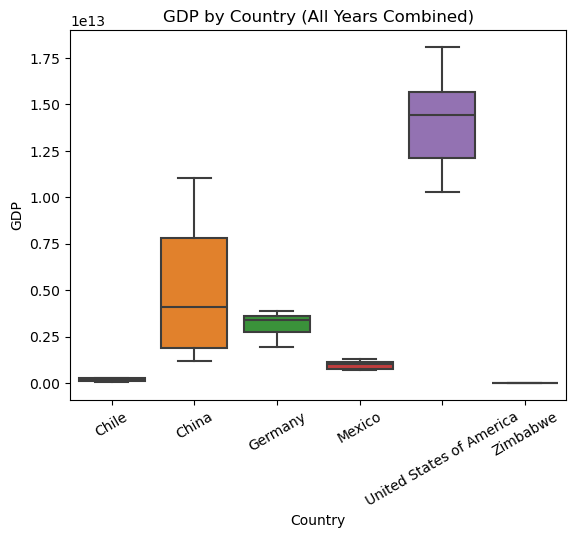

<Figure size 640x480 with 0 Axes>

In [21]:
sns.boxplot(x = 'Country', y = 'GDP', data = life_expectancy_data)
plt.xticks(rotation=30)
plt.title('GDP by Country (All Years Combined)')
plt.show()
plt.clf()

## Country GDP Trend

C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\lawre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

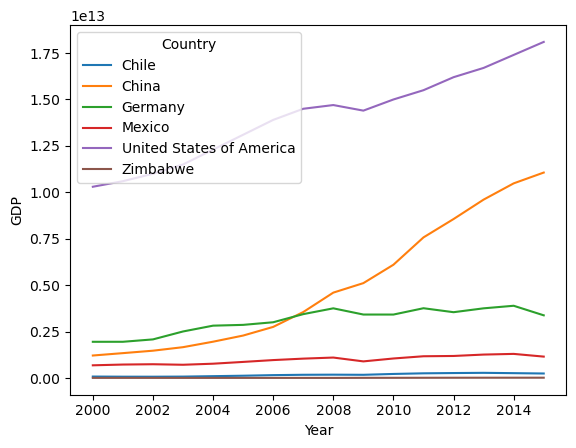

<Figure size 640x480 with 0 Axes>

In [34]:
sns.lineplot(x='Year', y='GDP', data=life_expectancy_data, hue='Country')
plt.show()
plt.clf()

## Scatter Plot of Life Expectancy vs GDP

Intercept    7.672234e+01
GDP          1.308337e-11
dtype: float64


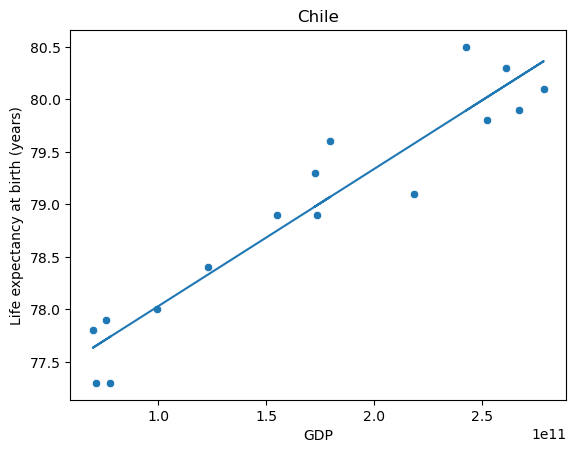

The correlation between GDP and Life Expectancy in Chile is 0.9498766659254417
Intercept    7.256685e+01
GDP          3.420219e-13
dtype: float64


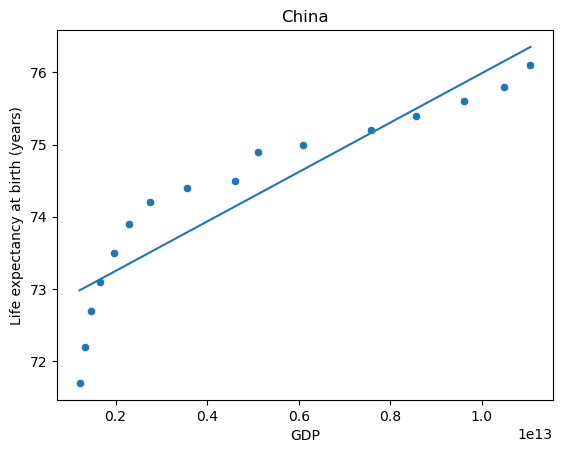

The correlation between GDP and Life Expectancy in China is 0.9085255408648356
Intercept    7.543994e+01
GDP          1.362397e-12
dtype: float64


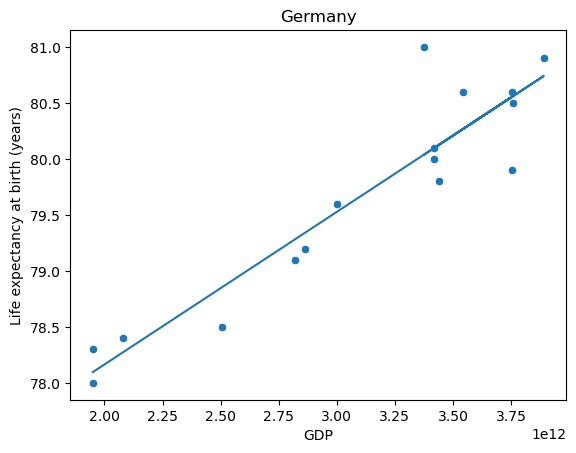

The correlation between GDP and Life Expectancy in Germany is 0.9326988982561274
Intercept    7.302091e+01
GDP          2.762337e-12
dtype: float64


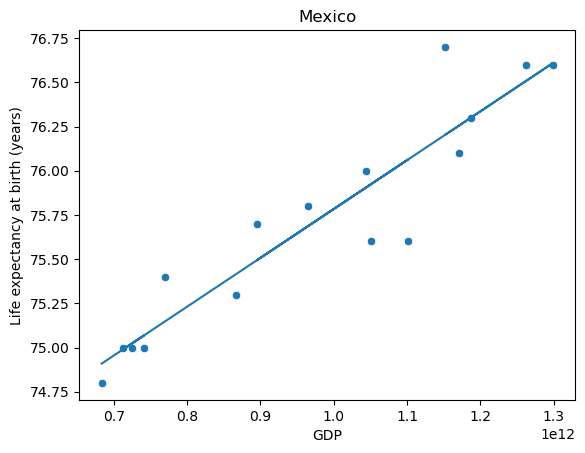

The correlation between GDP and Life Expectancy in Mexico is 0.9322377167847082
Intercept    7.333357e+01
GDP          3.359806e-13
dtype: float64


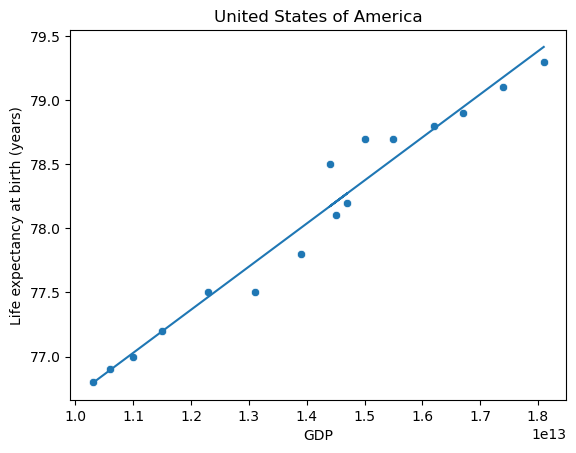

The correlation between GDP and Life Expectancy in United States of America is 0.9817092382430256
Intercept    3.799250e+01
GDP          1.335299e-09
dtype: float64


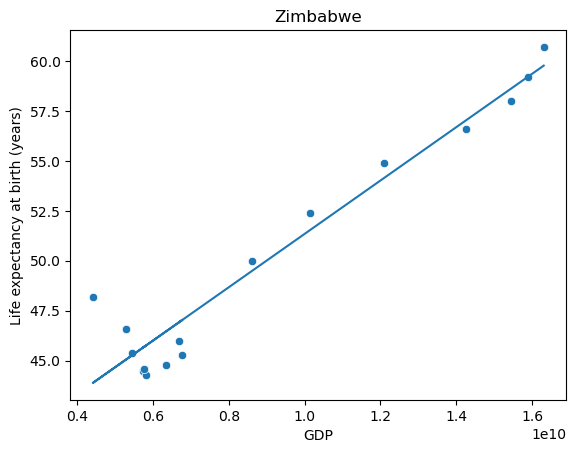

The correlation between GDP and Life Expectancy in Zimbabwe is 0.9661998955858779


<Figure size 640x480 with 0 Axes>

In [74]:
country_names = life_expectancy_data['Country'].unique()

for i in range(len(country_names)):
    sns.scatterplot(x = 'GDP', y = 'Life expectancy at birth (years)', data = life_expectancy_data[life_expectancy_data['Country'] == country_names[i]])
    plt.title(country_names[i])
    model = sm.OLS.from_formula('Q("Life expectancy at birth (years)") ~ GDP', life_expectancy_data[life_expectancy_data['Country'] == country_names[i]])
    results = model.fit()
    print(results.params)
    plt.plot(life_expectancy_data[life_expectancy_data['Country'] == country_names[i]].GDP, results.params.iloc[1]*life_expectancy_data[life_expectancy_data['Country'] == country_names[i]].GDP + results.params.iloc[0])
    plt.show()
    plt.clf()
    print("The correlation between GDP and Life Expectancy in " + country_names[i] + " is " + str(np.corrcoef(life_expectancy_data[life_expectancy_data['Country'] == country_names[i]]['GDP'],life_expectancy_data[life_expectancy_data['Country'] == country_names[i]]['Life expectancy at birth (years)'])[0][1]))

# Conclusions

* Has life expectancy increased over time in the six nations?
    * Yes, as shown in the "Country Life Expectancy Trend by Year" chart
* Has GDP increased over time in the six nations?
    * Yes, as shown in the "Country GDP Trend" chart
* Is there a correlation between GDP and life expectancy of a country?
    * Yes, as shown by the high correlation coefficients for each country
* What is the average life expectancy in these nations?
    * 70s for all countries except Zimbabwe which is in the 50s
* What is the distribution of that life expectancy?
    * Most countries had similar life expectancies, with Zimbabwe's being lower. This gave the distribution a right skew.